# 2019 Bay Wheels Ride Data Exploration and Visualization
## by Nina Haide

## Investigation Overview

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2019.

## Dataset Overview

> The dataset used for this exploratory analysis consists of monthly individual trip data from January 2019 to December 2019 in CSV format covering the greater San Francisco Bay area, raw data is available here. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips19 = pd.read_csv('fordgobike_trips_2019_clean.csv')

trips19['start_time'] = pd.to_datetime(trips19['start_time'])
trips19['end_time'] = pd.to_datetime(trips19['end_time'])

trips19['start_station_id'] = trips19['start_station_id'].astype('str')
trips19['end_station_id'] = trips19['end_station_id'].astype('str')
trips19['bike_id'] = trips19['bike_id'].astype('str')

trips19['user_type'] = trips19['user_type'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips19['start_dayofweek'] = trips19['start_dayofweek'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips19['start_month'] = trips19['start_month'].astype(monthcat)

trips19.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480401 entries, 0 to 2480400
Data columns (total 22 columns):
bike_id                    2480401 non-null object
bike_share_for_all_trip    2361079 non-null object
duration_sec               2480401 non-null int64
end_station_id             2480401 non-null object
end_station_latitude       2480401 non-null float64
end_station_longitude      2480401 non-null float64
end_station_name           2399384 non-null object
end_time                   2480401 non-null datetime64[ns]
rental_access_method       119322 non-null object
start_station_id           2480401 non-null object
start_station_latitude     2480401 non-null float64
start_station_longitude    2480401 non-null float64
start_station_name         2401440 non-null object
start_time                 2480401 non-null datetime64[ns]
user_type                  2480401 non-null category
duration_minute            2480401 non-null float64
start_date                 2480401 non-null object

### User Types and Their Weekly Usage
Subscribers contributed the majority of the bike usage in 2019. Subscribers have a high usage during the week and drop on the weekends, while customers show a balanced usage rate each day and peaked in July. The usage rate is clearly low during night time, peaks can be observed at rush hours of 8am and 17pm.

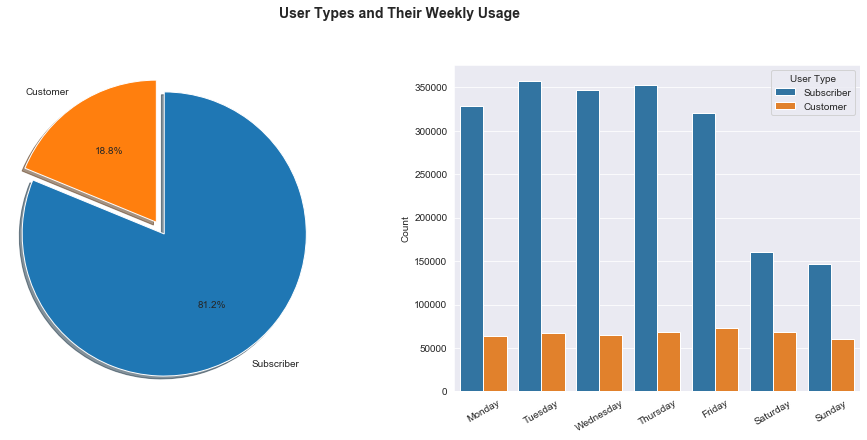

In [3]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = trips19.user_type.value_counts()/trips19.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=trips19, x='start_dayofweek', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Weekly Usage', fontsize=14, fontweight='semibold', y=1.015);

### Hourly Usage during Weekdays for Customers and Subscribers
Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on work days i.e. Monday through Friday, whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet casual customers tended to use more in the late afternoon around 17pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.

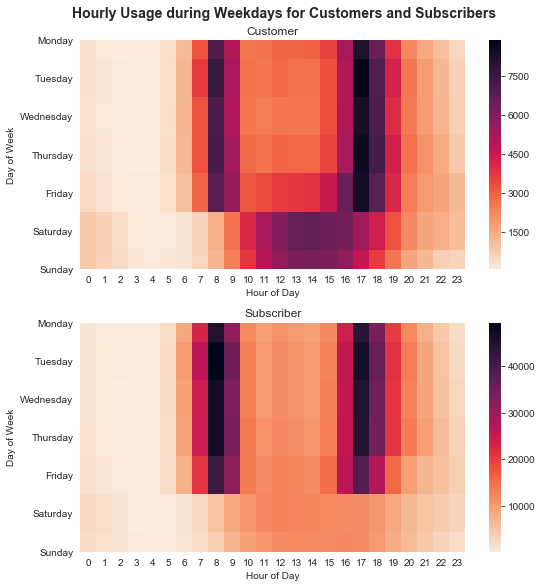

In [4]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = trips19.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = trips19.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

### Average Trip Duration for Customers and Subscribers
Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

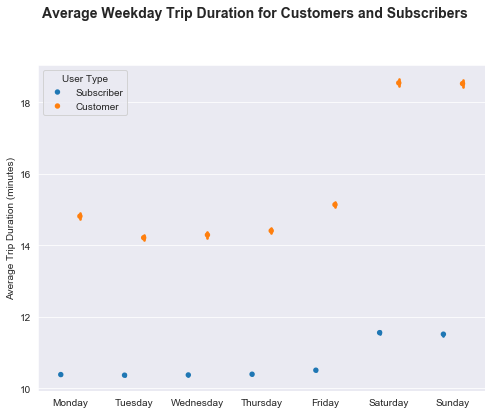

In [5]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=trips19, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Summary
There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of riders. Subscribers used the system heavily on work days concentrated around 8-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.

In [6]:
!jupyter nbconvert --to slides slide_deck_template.ipynb --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 430979 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ninah\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ninah\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ninah\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\ninah\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\ninah\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File